## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../satori')

from postprocess import *

### Load the interaction results

In [2]:
exp_name = "../results/human_promoters/SPLIT_NEW/baseline/E1/"
satori_file = exp_name + "Interactions_SATORI/interactions_summary_attnLimit-0.02999554731674315.txt"
fis_file = exp_name + "Interactions_FIS/interactions_summary_attnLimit-0.txt"


#output = "../results/human_promoters/LAST_exps/fhd_entropy/E2/"

In [3]:
# For SATORI based interactions
df_A = pd.read_csv(satori_file,sep='\t')
#df_A = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8d/Interactions_SATORI/interactions_summary_attnLimit-0.04.txt',sep='\t')

# For FIS based interactions
df_B = pd.read_csv(fis_file,sep='\t')
#df_B = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Load the annotation file

In [4]:
fhd_file = "/s/chromatin/k/nobackup/p/altsplice1/fahad/DeepLearning/Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt"
df_annotate = pd.read_csv(fhd_file,sep='\t')

In [7]:
df_A

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter1<-->filter5,202,M0891_1.02,0.028469,M1110_1.02,0.013498,18.0,450.0,76.0,223.0,0.997332,1.0
1,filter1<-->filter7,204,M0891_1.02,0.028469,M1605_1.02,0.017749,468.0,312.0,49.0,209.0,0.931746,1.0
2,filter1<-->filter8,205,M0891_1.02,0.028469,M0891_1.02,0.000013,18.0,342.0,52.0,244.0,0.999847,1.0
3,filter1<-->filter9,206,M0891_1.02,0.028469,M0408_1.02,0.036461,306.0,12.0,88.0,259.0,0.999998,1.0
4,filter1<-->filter10,207,M0891_1.02,0.028469,M0609_1.02,0.017444,54.0,408.0,73.0,233.0,0.998992,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5969,filter187<-->filter192,19826,M0607_1.02,0.043917,M1605_1.02,0.039023,294.0,174.0,76.0,191.0,0.806959,1.0
5970,filter187<-->filter199,19833,M0607_1.02,0.043917,M0609_1.02,0.004823,126.0,48.0,128.0,119.0,0.886388,1.0
5971,filter189<-->filter192,19847,M0607_1.02,0.008165,M1605_1.02,0.039023,534.0,36.0,51.0,136.0,0.934184,1.0
5972,filter189<-->filter199,19854,M0607_1.02,0.008165,M0609_1.02,0.004823,36.0,174.0,82.0,75.0,0.381912,1.0


In [5]:
filter_data_on_thresholds(df_B, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05).shape

(1105, 12)

### Pre-process the interactions

In [6]:
ATTN = preprocess_for_comparison(df_A, annotation_df=df_annotate)
DFIM = preprocess_for_comparison(df_B, annotation_df=df_annotate)

### Individual interactions analysis

#### Get unique interactions per method and their intersection

In [7]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='TF_Interaction')

In [26]:
ATTN[ATTN['TF_Interaction'] == "SOX1$\longleftrightarrow$TLX2"]

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
1,filter1<-->filter8,205,M1605_1.02,0.006896,M0891_1.02,0.001884,150.0,150.0,168.0,170.0,4.364537e-15,1.985006e-14,SOX1,TLX2,SOX1$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
6,filter1<-->filter17,214,M1605_1.02,0.006896,M0891_1.02,0.015949,6.0,504.0,112.0,155.0,1.342558e-20,1.368996e-19,SOX1,TLX2,SOX1$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
7,filter1<-->filter23,220,M1605_1.02,0.006896,M0891_1.02,0.006944,78.0,204.0,119.0,154.0,1.481696e-11,4.204058e-11,SOX1,TLX2,SOX1$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
8,filter1<-->filter24,221,M1605_1.02,0.006896,M0891_1.02,0.000769,84.0,168.0,110.0,128.0,5.318846e-14,2.093013e-13,SOX1,TLX2,SOX1$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
16,filter1<-->filter36,233,M1605_1.02,0.006896,M0891_1.02,0.008725,360.0,318.0,93.0,98.0,5.900322e-19,4.698519e-18,SOX1,TLX2,SOX1$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,filter161<-->filter182,19179,M1605_1.02,0.040274,M0891_1.02,0.007582,60.0,282.0,23.0,70.0,2.165410e-04,2.772148e-04,SOX1,TLX2,SOX1$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
4481,filter161<-->filter198,19195,M1605_1.02,0.040274,M0891_1.02,0.012882,282.0,60.0,68.0,161.0,2.129612e-12,6.764409e-12,SOX1,TLX2,SOX1$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
4544,filter181<-->filter185,19732,M0891_1.02,0.000009,M1605_1.02,0.044528,396.0,210.0,106.0,229.0,1.862238e-24,3.543420e-23,TLX2,SOX1,SOX1$\longleftrightarrow$TLX2,Homeodomain,Sox,Sox$\longleftrightarrow$Homeodomain
4548,filter182<-->filter185,19749,M0891_1.02,0.007582,M1605_1.02,0.044528,192.0,18.0,23.0,99.0,2.103203e-04,2.695462e-04,TLX2,SOX1,SOX1$\longleftrightarrow$TLX2,Homeodomain,Sox,Sox$\longleftrightarrow$Homeodomain


In [9]:
len(set(DFIM_unique.keys()))

227

In [10]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 227, SATORI: 7, Common: 4


#### Comparison plot: individual interactions

In [26]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(ATTN_unique, DFIM_unique)

In [11]:
df_res['in_both'].value_counts()

r    228
b     15
Name: in_both, dtype: int64

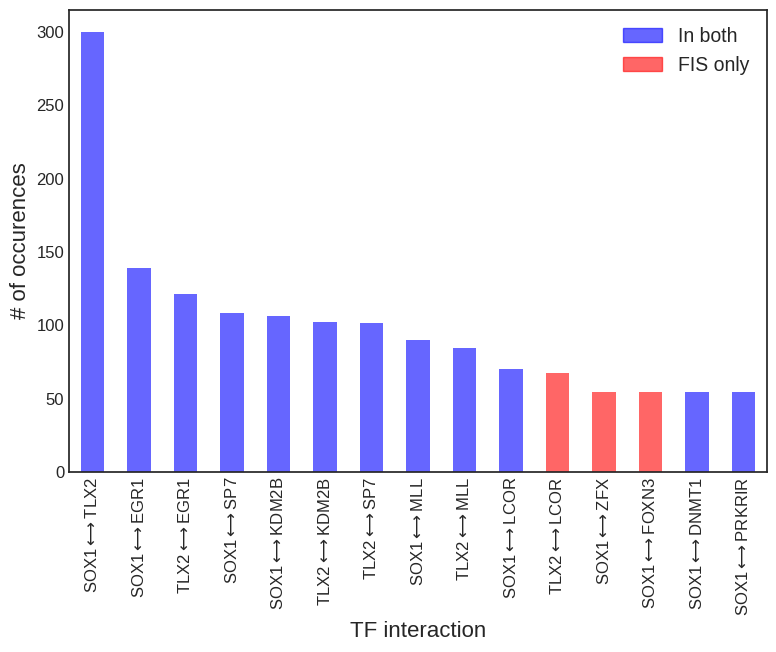

In [27]:
plot_interaction_comparison(df_res, first_n=15, xlabel='TF interaction', store_pdf_path=f'{output}/human_satori-vs-fis_TFs.pdf', fig_size=(9,6))

### Family interactions analysis

#### Get unique family interactions per method and their intersection

In [28]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='Family_Interaction')

In [29]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 42, SATORI: 59, Common: 14


#### Comparison plot: family interactions

In [32]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(ATTN_unique, DFIM_unique)

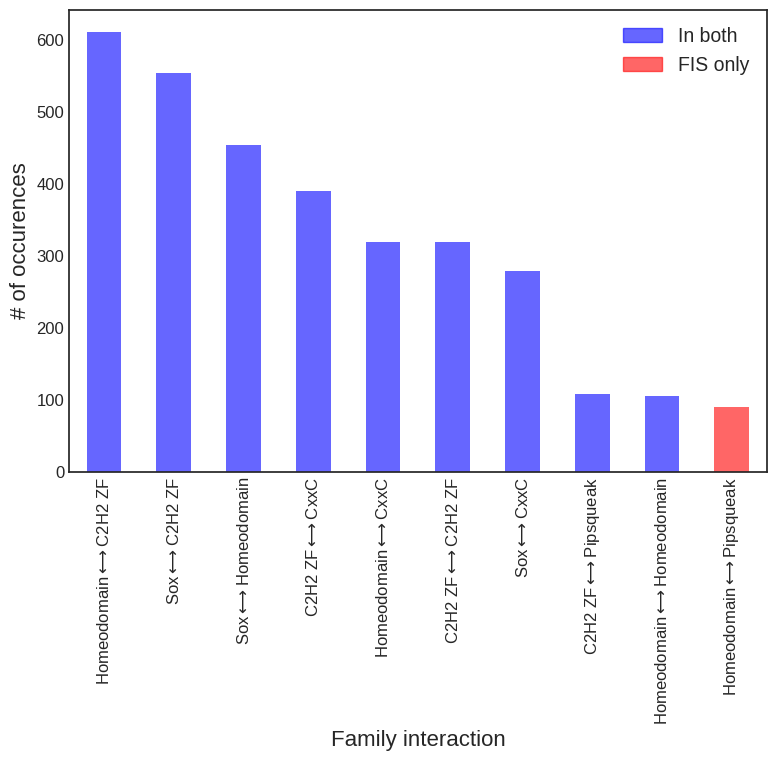

In [33]:
plot_interaction_comparison(df_res, first_n=10, xlabel='Family interaction', store_pdf_path=f'{output}/human_satori-vs-fis_Fams3.pdf', fig_size=(9,6))